<a href="https://colab.research.google.com/github/dorinhazan/Human-Activity-Recognition-Using-Smartphones/blob/main/Activity_recognition_using_smartphone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install optuna

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import optuna
from sklearn.model_selection import train_test_split


In [3]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

print(f'Shape of train data is: {train_data.shape}\nShape of test data is: {test_data.shape}')

Shape of train data is: (7352, 563)
Shape of test data is: (2947, 563)


In [5]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [6]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [7]:
train_data['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

<Axes: xlabel='Activity'>

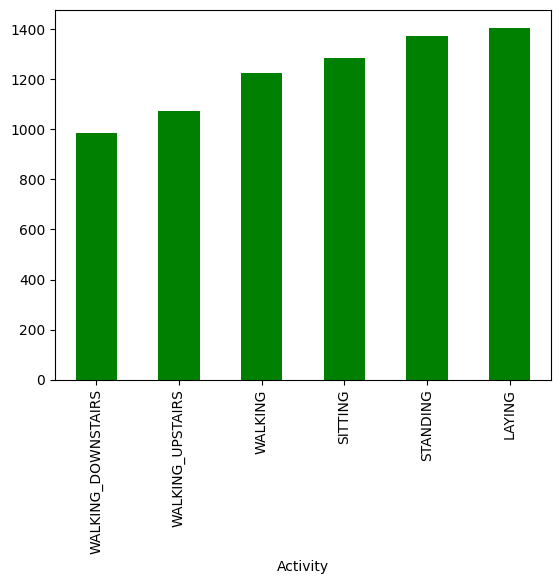

In [8]:
train_data['Activity'].value_counts().sort_values().plot(kind = 'bar', color = 'green')


In [9]:
x_train, y_train = train_data.iloc[:, :-2], train_data.iloc[:, -1:]
x_train.shape, y_train.shape

((7352, 561), (7352, 1))

In [10]:
x_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]
x_test.shape, y_test.shape

((2947, 561), (2947, 1))

<ipython-input-21-4408f8ed8dd5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=train_data, x='Activity', palette='Set2')


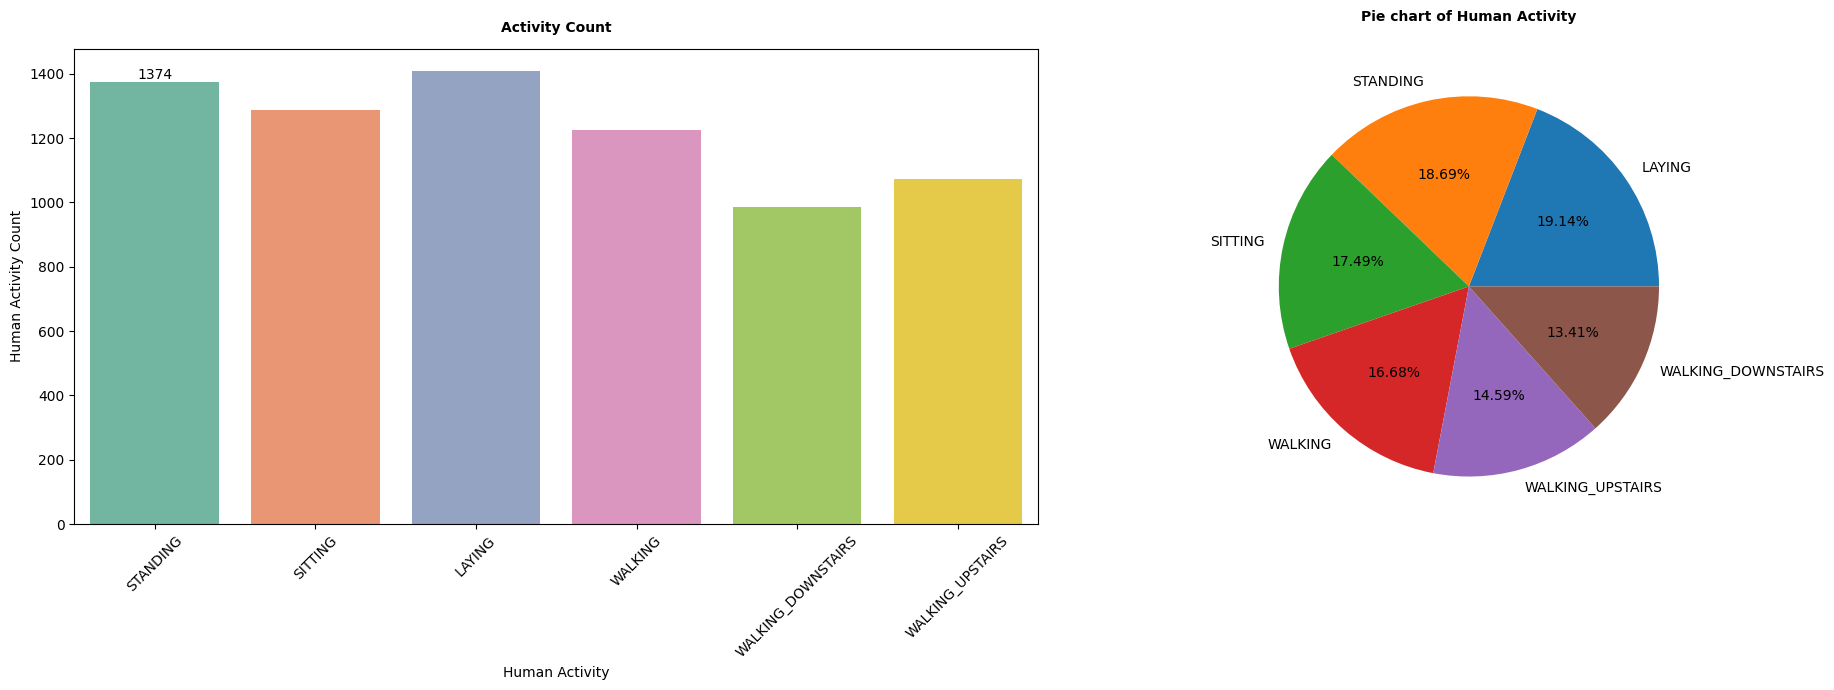

In [21]:
plt.figure(figsize=(20, 7))

# Bar Chart
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=train_data, x='Activity', palette='Set2')
plt.title("Activity Count", pad=12, fontsize=10, fontweight='bold')
plt.xlabel('Human Activity')
plt.ylabel('Human Activity Count')
plt.xticks(rotation=45)
ax1.bar_label(ax1.containers[0])

# Pie Chart
plt.subplot(1, 2, 2)
activity_count_labels = train_data['Activity'].value_counts()
plt.pie(activity_count_labels,
        autopct="%.2f%%",
        labels=activity_count_labels.index
)
plt.title("Pie chart of Human Activity", pad=20, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [11]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
scaling_data = MinMaxScaler()
x_train = scaling_data.fit_transform(x_train)
x_test = scaling_data.transform(x_test)

Creating A Base Model

In [13]:
# # Convert NumPy arrays to tensors
# def prepare_loaders(x_train, y_train, x_test, y_test, batch_size=64):
#     train_dataset = TensorDataset(torch.tensor(x_train, dtype=torch.float32),
#                                   torch.tensor(y_train, dtype=torch.long))
#     test_dataset = TensorDataset(torch.tensor(x_test, dtype=torch.float32),
#                                  torch.tensor(y_test, dtype=torch.long))
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#     test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
#     return train_loader, test_loader


In [14]:
# class ActivityModel(nn.Module):
#     def __init__(self, input_dim, layers_config, activation):
#         super(ActivityModel, self).__init__()
#         layers = []
#         for units in layers_config:
#             layers.append(nn.Linear(input_dim, units))
#             layers.append(activation())
#             layers.append(nn.Dropout(0.2))
#             input_dim = units
#         layers.append(nn.Linear(input_dim, 6))  # 6 output classes
#         self.model = nn.Sequential(*layers)

#     def forward(self, x):
#         return self.model(x)

# def train_model(model, train_loader, val_loader, epochs=10):
#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.Adam(model.parameters(), lr=0.001)
#     for epoch in range(epochs):
#         model.train()
#         for batch_x, batch_y in train_loader:
#             optimizer.zero_grad()
#             outputs = model(batch_x)
#             loss = criterion(outputs, batch_y)
#             loss.backward()
#             optimizer.step()
#     # Evaluate
#     model.eval()
#     correct, total = 0, 0
#     with torch.no_grad():
#         for batch_x, batch_y in val_loader:
#             outputs = model(batch_x)
#             _, preds = torch.max(outputs, 1)
#             total += batch_y.size(0)
#             correct += (preds == batch_y).sum().item()
#     return correct / total


In [15]:
# def objective(trial, x_train, y_train, x_val, y_val):
#     num_layers = trial.suggest_int("num_layers", 2, 6)
#     activation_name = trial.suggest_categorical("activation", ["ReLU", "Sigmoid", "Tanh"])
#     units = [trial.suggest_int(f"units_l{i}", 32, 256, step=32) for i in range(num_layers)]

#     activation = getattr(nn, activation_name)
#     model = ActivityModel(input_dim=x_train.shape[1], layers_config=units, activation=activation)

#     train_loader, val_loader = prepare_loaders(x_train, y_train, x_val, y_val)
#     acc = train_model(model, train_loader, val_loader)
#     return acc


In [16]:
# x_scaler = StandardScaler() # Create a StandardScaler instance
# x_train_scaled = x_scaler.fit_transform(x_train) # Fit and transform x_train
# x_test_scaled = x_scaler.transform(x_test) # Transform x_test using the same scaler

# x_train_part, x_val_part, y_train_part, y_val_part = train_test_split(x_train_scaled, y_train, test_size=0.2, random_state=42)

# study1 = optuna.create_study(direction="maximize")
# study1.optimize(lambda trial: objective(trial, x_train_part, y_train_part, x_val_part, y_val_part), n_trials=5)

# # Best model
# best_trial1 = study1.best_trial
# print("Best hyperparameters without PCA:", best_trial1.params)


In [17]:
# # Apply PCA
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# pca = PCA(n_components=0.95)
# x_train_pca = pca.fit_transform(x_train_scaled)
# x_test_pca = pca.transform(x_test_scaled)

# x_train_pca_part, x_val_pca_part, y_train_pca_part, y_val_pca_part = train_test_split(x_train_pca, y_train, test_size=0.2, random_state=42)

# study2 = optuna.create_study(direction="maximize")
# study2.optimize(lambda trial: objective(trial, x_train_pca_part, y_train_pca_part, x_val_pca_part, y_val_pca_part), n_trials=5)

# # Best model
# best_trial2 = study2.best_trial
# print("Best hyperparameters with PCA:", best_trial2.params)


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# Optional: Feature Selection
def select_features(X, y, k=200):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    return X_selected

# Apply feature selection (optional)
X_train_fs = select_features(x_train, y_train.ravel(), k=200)
X_test_fs = select_features(x_test, y_test.ravel(), k=200)

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(X_train_fs, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.ravel(), dtype=torch.long)
x_test_tensor = torch.tensor(X_test_fs, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.ravel(), dtype=torch.long)

# Dataset and loaders
dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(TensorDataset(x_test_tensor, y_test_tensor), batch_size=64)

# Flexible model definition
class ActivityClassifier(nn.Module):
    def __init__(self, input_dim, hidden_units=64, activation='relu'):
        super(ActivityClassifier, self).__init__()
        activation_fn = {
            'relu': nn.ReLU(),
            'sigmoid': nn.Sigmoid(),
            'tanh': nn.Tanh()
        }[activation]

        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_units),
            activation_fn,
            nn.Dropout(0.2),
            nn.Linear(hidden_units, 6)
        )

    def forward(self, x):
        return self.model(x)

# Training function with Early Stopping
def train_model(model, train_loader, val_loader, epochs=30, patience=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    best_val_acc = 0
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for x_val, y_val in val_loader:
                outputs = model(x_val)
                _, preds = torch.max(outputs, 1)
                total += y_val.size(0)
                correct += (preds == y_val).sum().item()

        val_acc = correct / total
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}, Val Acc: {val_acc:.4f}")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

    model.load_state_dict(best_model_state)
    return model

# Build and train model
input_dim = X_train_fs.shape[1]
model = ActivityClassifier(input_dim=input_dim, hidden_units=128, activation='relu')
model = train_model(model, train_loader, val_loader)

# Evaluate on test set
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        outputs = model(x_batch)
        _, preds = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (preds == y_batch).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Epoch 1, Loss: 104.8610, Val Acc: 0.7464
Epoch 2, Loss: 56.1750, Val Acc: 0.8117
Epoch 3, Loss: 40.5530, Val Acc: 0.8953
Epoch 4, Loss: 33.7934, Val Acc: 0.9069
Epoch 5, Loss: 28.6634, Val Acc: 0.8973
Epoch 6, Loss: 25.0606, Val Acc: 0.9157
Epoch 7, Loss: 22.7239, Val Acc: 0.9177
Epoch 8, Loss: 20.3391, Val Acc: 0.9307
Epoch 9, Loss: 19.2070, Val Acc: 0.9286
Epoch 10, Loss: 17.6299, Val Acc: 0.9266
Epoch 11, Loss: 16.7609, Val Acc: 0.9293
Epoch 12, Loss: 15.6474, Val Acc: 0.9327
Epoch 13, Loss: 15.1355, Val Acc: 0.9381
Epoch 14, Loss: 14.5484, Val Acc: 0.9429
Epoch 15, Loss: 14.0860, Val Acc: 0.9443
Epoch 16, Loss: 13.2513, Val Acc: 0.9463
Epoch 17, Loss: 12.9702, Val Acc: 0.9409
Epoch 18, Loss: 12.8453, Val Acc: 0.9429
Epoch 19, Loss: 11.8556, Val Acc: 0.9517
Epoch 20, Loss: 12.1989, Val Acc: 0.9477
Epoch 21, Loss: 12.0891, Val Acc: 0.9531
Epoch 22, Loss: 11.4584, Val Acc: 0.9402
Epoch 23, Loss: 11.2893, Val Acc: 0.9551
Epoch 24, Loss: 10.7952, Val Acc: 0.9565
Epoch 25, Loss: 10.4765,